In [22]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [20]:
tmax = 100
N = 1000
t = np.linspace(0, tmax, N)
dt = t[1] - t[0]

## Brownian motion

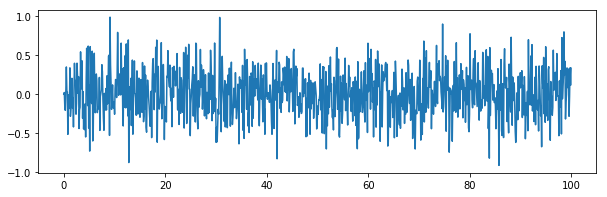

In [29]:
D = 1
s = np.sqrt(D * dt)
increments = np.concatenate([
    [0], 
    norm.rvs(loc=0, scale=s, size=t.shape[0]-1)
])
plt.figure(figsize=(10,3))
plt.plot(t, increments )
plt.show()

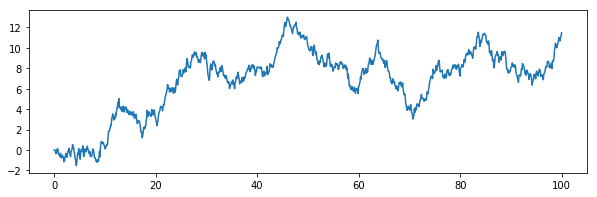

In [30]:
nu_0 = 0
BM_path = nu_0 + np.cumsum(increments)
plt.figure(figsize=(10,3))
plt.plot(t, BM_path)
plt.show()

In [78]:
def BM_path(t, nu_0, D):
    s = np.sqrt(D * dt)
    increments = np.concatenate([
        [0], 
        norm.rvs(loc=0, scale=s, size=t.shape[0]-1)
    ])
    bm = nu_0 + np.cumsum(increments)
    return bm

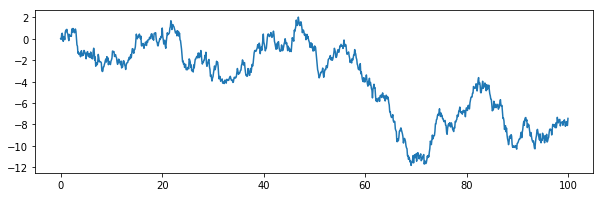

In [36]:
plt.figure(figsize=(10,3))
plt.plot(t, BM_path(t, nu_0, D))
plt.show()

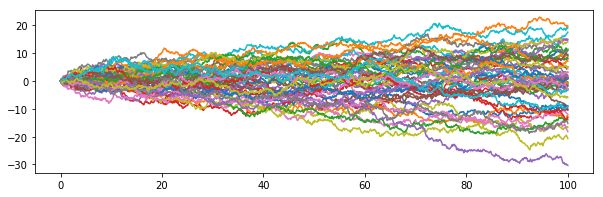

In [44]:
replicas = 50
paths = np.zeros([replicas, len(t)])
for r in range(replicas):
    paths[r, :] = BM_path(t, nu_0, D)
    
plt.figure(figsize=(10,3))
for path in paths:
    plt.plot(t, path)
plt.show()

In [75]:
replicas = 1000
nu_0 = 10
D = 3
paths = np.zeros([replicas, len(t)])
for r in range(replicas):
    paths[r, :] = BM_path(t, nu_0, D)

In [76]:
covariance = np.cov(paths.T)

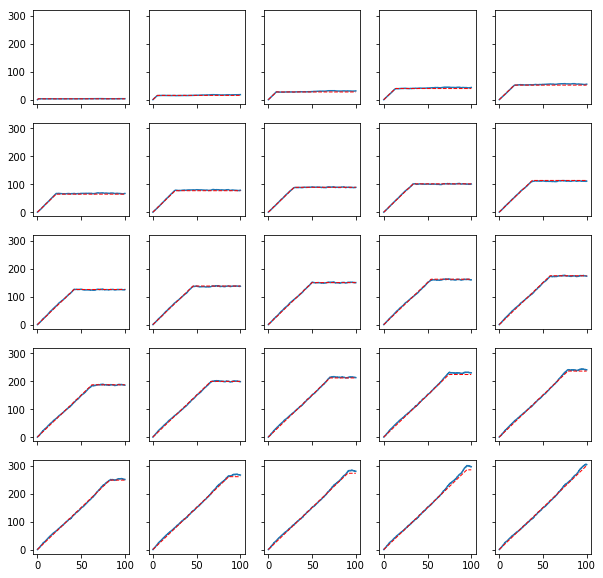

In [77]:
w = 5
h = 5
fig, axes = plt.subplots(w,h, figsize=(10,10), sharex=True, sharey=True)
s_array = np.linspace(1, tmax-1, w*h)
axes = axes.flatten()
for ax, s in zip(axes, s_array):
    s_idx = int(s * N / tmax)
    ax.plot(t, covariance[s_idx, :])
    ax.plot([0, s, tmax], [0, D*s, D*s], 'r--', lw=1)

plt.show()

## Integral of Brownian motion

In [79]:
def intBM_path(t, mu_0, nu_0, D):
    bm = BM_path(t, nu_0, D)
    dt = t[1] - t[0]
    intbm = np.cumsum(bm) * dt
    return intbm

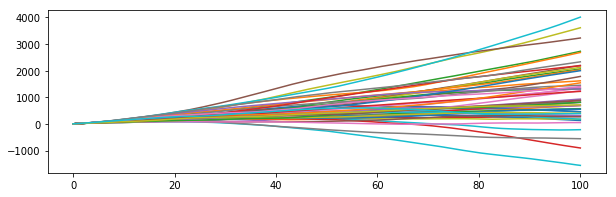

In [83]:
replicas = 50
paths = np.zeros([replicas, len(t)])
for r in range(replicas):
    paths[r, :] = intBM_path(t, 0, 10, D)
    
plt.figure(figsize=(10,3))
for path in paths:
    plt.plot(t, path)
plt.show()

In [84]:
replicas = 1000
nu_0 = 10
mu_0 = 10
D = 3
paths = np.zeros([replicas, len(t)])
for r in range(replicas):
    paths[r, :] = intBM_path(t, mu_0, nu_0, D)

In [85]:
covariance = np.cov(paths.T)

In [92]:
def intbm_cov_theory(D, t1, t2):
    low = np.min([t1, t2])
    high = np.max([t1, t2])
    return D * low**2 / float(2) * (high - low/float(3))

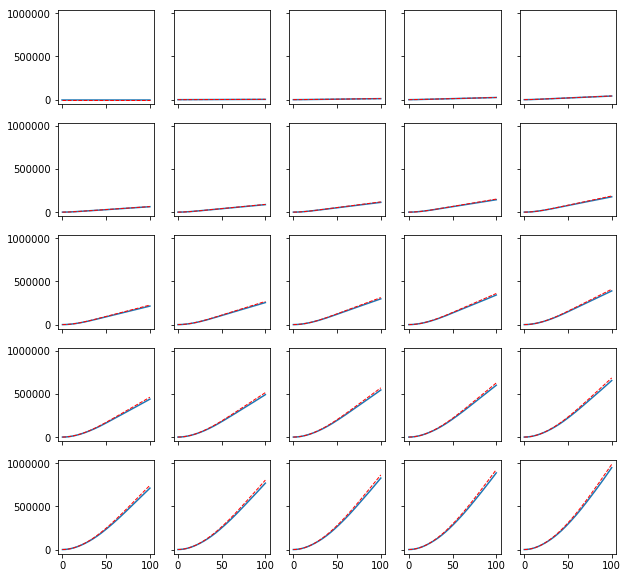

In [93]:
w = 5
h = 5
fig, axes = plt.subplots(w,h, figsize=(10,10), sharex=True, sharey=True)
s_array = np.linspace(1, tmax-1, w*h)
axes = axes.flatten()
for ax, s in zip(axes, s_array):
    s_idx = int(s * N / tmax)
    ax.plot(t, covariance[s_idx, :])
    ax.plot(t, [intbm_cov_theory(D, s, ti) for ti in t], 'r--', lw=1)
plt.show()